# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.
- Programmatically downloading file 'Crash_Reporting_-_Drivers_Data'
- Download data manually 'Traffic_Violations'

### **1.1.** Problem Statement

In this project, I will investigate whether certain car makes and models are more likely to be involved in traffic violations and crashes. I will analyze data from two datasets: one focusing on traffic violations and the other on crash reports. By comparing vehicle characteristics across these datasets, I aim to identify any trends that could help improve road safety measures.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import requests

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# magic word
%matplotlib inline

# **Dataset 1 - Crash_Reporting_-_Drivers_Data**

Type: CSV File

Method: The data was programmatically downloaded from the official source using a custom function designed to fetch the dataset from a given URL. This ensures the latest and most accurate information is obtained for analysis.

Dataset variables:

- Vehicle Make: Represents the manufacturer or brand of the vehicle involved in the crash.
- Vehicle Model: Refers to the specific model of the vehicle.
- Vehicle Year: Indicates the manufacturing year of the vehicle.
- Collision Type: Specifies the type of collision that occurred in the crash.
- Driver At Fault: Indicates whether the driver was at fault in the crash.

### Data Gathering Method 1: Programmatically downloading file 'Crash_Reporting_-_Drivers_Data'

In [2]:
# Function to get data from a given URL and show some basic info
def get_and_show_data_info(url):
    from io import StringIO
    
    # Get the file
    response = requests.get(url)

    # Check if it's okay
    if response.status_code == 200:
        # Read the content of the response into a pandas DataFrame
        crash_report = pd.read_csv(url, dtype=str)

        # Basic info about the dataset
        print(f"Headers: {list(crash_report.columns)}")
        print(f"Number of columns: {len(crash_report.columns)}")
        print(f"Number of rows: {len(crash_report)}")
        return crash_report  # Return the dataframe
    else:
        print("Failed to get the data.")

# URL of the dataset
url = 'https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD'
# Get and show some basic info about the dataset
crash_report = get_and_show_data_info(url)

Headers: ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude', 'Location']
Number of columns: 43
Number of rows: 172105


# **Dataset 2 - Traffic_Violations**

Type: CSV File

Method: The data was downloaded manually from the official source website: data.gov 

Dataset variables:

- Violation Type: Specifies the type of traffic violation committed.
- Make: Represents the manufacturer or brand of the vehicle involved.
- Model: Refers to the specific model of the vehicle.
- Year: Indicates the manufacturing year of the vehicle.

### Data Gathering Method 2: Download data manually 'Traffic_Violations'


1. Visit the Kaggle dataset page for "Traffic_Violations" using URL: https://www.kaggle.com/datasets/alinoranianesfahani/traffic-violations
2. Download the dataset by clicking on the "Download" button/link.
3. Once downloaded, locate the dataset file on your computer.
4. Move or copy the dataset file into your workplace folder.



In [3]:
# Specify column 34 as string data type to ensure consistent interpretation of the data.
# This resolves a warning about mixed data types and ensures smooth data processing.
dtype_spec = {34: str}  # specifying column 34 as text because it contains text data.

# Load the CSV file into a DataFrame
traffic_violations_df = pd.read_csv('Traffic_Violations.csv', dtype=dtype_spec)

# Display the headers of the DataFrame
headers = traffic_violations_df.columns.tolist()
print("Headers:", headers)

# Display the number of rows and columns in the DataFrame
num_rows, num_columns = traffic_violations_df.shape
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

Headers: ['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Reason For Stop', 'Search Type', 'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type', 'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender', 'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation']
Number of columns: 43
Number of rows: 1908963


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

## Issue 1: Data Quality - Numeric Values in 'Vehicle Make' Column:
The 'Vehicle Make' column, which is expected to contain only textual information indicating the brand of the vehicle, contains numeric values. These numeric entries are inconsistent with the intended data format for this column and represent a data quality issue affecting the accuracy and reliability of the dataset.

### Inspecting the dataframe visually - crash_report

In [4]:
# Define the is_numeric function
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

print("\nInspecting the dataframe visually:")
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(crash_report.head())
# Display the last few rows of the dataframe
print("\nLast few rows of the dataframe:")
print(crash_report.tail())

# Count the number of rows where the value in 'Vehicle Make' is numeric before cleaning
numeric_values_before_cleaning = crash_report['Vehicle Make'].apply(is_numeric).sum()

print(f"Number of numeric values in 'Vehicle Make' column: {numeric_values_before_cleaning}")



Inspecting the dataframe visually:
First few rows of the dataframe:
  Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  01/03/2024 02:55:00 PM               NaN   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash  11/05/2023 09:07:00 PM  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0               NaN               NaN               NaN   
1     G

Issue: The 'Vehicle Make' column contains numeric values instead of textual information, which deviates from the expected format for this column.

Justification: Rectifying this issue ensures that the 'Vehicle Make' column maintains consistency with its intended format, reducing confusion and enhancing the dataset's reliability for analysis purposes. This adjustment promotes accurate interpretation of the data and strengthens its usability in analytical endeavors.

### Inspecting the dataframe visually - traffic_violations_df

In [5]:
# Inspecting the dataframe visually
print("\nInspecting the dataframe visually:")
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(traffic_violations_df.head())
# Display the last few rows of the dataframe
print("\nLast few rows of the dataframe:")
print(traffic_violations_df.tail())

# Assess completeness
print("\nCompleteness of the Traffic Violations Dataset:")
print(traffic_violations_df.isnull().sum())

# Assess validity, accuracy, consistency, and uniqueness programmatically
# Example: Check unique values for each column
print("\nValidity, Accuracy, Consistency, and Uniqueness in the Traffic Violations Dataset:")
for col in traffic_violations_df.columns:
    print(f"\nColumn: {col}")
    print(traffic_violations_df[col].value_counts())


Inspecting the dataframe visually:
First few rows of the dataframe:
                                  SeqID Date Of Stop Time Of Stop Agency  \
0  345bbc5d-d407-45b4-a51f-2b4adacf9622   11/08/2023     08:44:00    MCP   
1  9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00    MCP   
2  9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00    MCP   
3  9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00    MCP   
4  4afdfba3-2023-4bd5-b4d5-3d5875c9e97e   11/07/2023     09:52:00    MCP   

                     SubAgency  \
0  3rd District, Silver Spring   
1       2nd District, Bethesda   
2       2nd District, Bethesda   
3       2nd District, Bethesda   
4        4th District, Wheaton   

                                         Description  \
0  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
1  DRIVING  MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...   
2  DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...   
3                KNOWINGLY DRIVING UNINSURED 

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                   159307
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                            85544
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                        55780
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND     50755
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                     48983
                                                                                              ...  
ATTENDED VEHICLE                                                                                  1
failto return reg plates                                                                          1
PEDESTRIAN FAIL TO OBEY DONT WALK", "UPRAISED HAND")SIGNAL                                        1
TAIL,FRNT,REAR, LIGTS ALL IN-OP                                                                   1


M    1285056
F     620873
U       3034
Name: Gender, dtype: int64

Column: Driver City
SILVER SPRING    469230
GAITHERSBURG     200976
GERMANTOWN       161456
ROCKVILLE        154816
WASHINGTON        60934
                  ...  
C ISLIP               1
CALABASAS             1
SIDNAW                1
EPPING                1
SUITELAND             1
Name: Driver City, Length: 8969, dtype: int64

Column: Driver State
MD    1723823
DC      63369
VA      58707
PA       9595
FL       6642
       ...   
SK          4
NS          3
PE          2
PQ          1
IT          1
Name: Driver State, Length: 68, dtype: int64

Column: DL State
MD    1661826
DC      64267
VA      62469
XX      27253
PA      11371
       ...   
PQ          6
MH          5
YT          5
NU          3
NF          2
Name: DL State, Length: 72, dtype: int64

Column: Arrest Type
A - Marked Patrol                         1546499
Q - Marked Laser                           181893
B - Unmarked Patrol                         7857

Similar column 'Date of Stop' is already in Date type opposed to DateTime. Therefore, no need to change the column type.

## Issue 2: Data Quality - Too many missing values in key columns which can hinder the analysis.
- crash_report: 'Vehicle Make' & 'Collision Type  
- traffic_violations_df: 'Make'

### Inspecting the dataframe programmatically - crash_report

In [6]:
print("\nInspecting the dataframe programmatically:")
# Display basic information about the dataframe including data types and memory usage
print("Information about the dataframe:")
print(crash_report.info())
# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(crash_report.describe())

# Assess completeness
print("Completeness:")
print(crash_report.isnull().sum())
# Check for missing values (completeness)
missing_values = crash_report.isnull().sum()
print("Missing values:")
print(missing_values)

missing_values = crash_report.isnull().sum()
# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

rows_with_missing_values = crash_report.isnull().any(axis=1).sum()
print(f"Rows with any missing values: {rows_with_missing_values}")

# Assess validity, accuracy, consistency, and uniqueness programmatically
# Example: Check unique values for each column
print("\nValidity, Accuracy, Consistency, and Uniqueness:")
for col in crash_report.columns:
    print(f"\nColumn: {col}")
    print(crash_report[col].value_counts())


Inspecting the dataframe programmatically:
Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Report Number                   172105 non-null  object
 1   Local Case Number               172105 non-null  object
 2   Agency Name                     172105 non-null  object
 3   ACRS Report Type                172105 non-null  object
 4   Crash Date/Time                 172105 non-null  object
 5   Route Type                      155132 non-null  object
 6   Road Name                       156168 non-null  object
 7   Cross-Street Type               155099 non-null  object
 8   Cross-Street Name               156154 non-null  object
 9   Off-Road Description            15935 non-null   object
 10  Municipality                    19126 non-null   object
 11  Related Non-Mo

Missing values in each column:
Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16973
Road Name                          15937
Cross-Street Type                  17006
Cross-Street Name                  15951
Off-Road Description              156170
Municipality                      152979
Related Non-Motorist              166642
Collision Type                       585
Weather                            13354
Surface Condition                  20118
Light                               1445
Traffic Control                    25469
Driver Substance Abuse             31324
Non-Motorist Substance Abuse      167788
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140746
Driver Distracted By      

NONE DETECTED                 122532
UNKNOWN                        11993
ALCOHOL PRESENT                 4084
ALCOHOL CONTRIBUTED             1435
ILLEGAL DRUG PRESENT             258
MEDICATION PRESENT               117
ILLEGAL DRUG CONTRIBUTED         102
COMBINED SUBSTANCE PRESENT        92
MEDICATION CONTRIBUTED            64
OTHER                             58
COMBINATION CONTRIBUTED           46
Name: Driver Substance Abuse, dtype: int64

Column: Non-Motorist Substance Abuse
NONE DETECTED                           3861
UNKNOWN                                  229
ALCOHOL PRESENT                          145
ALCOHOL CONTRIBUTED                       39
N/A, NONE DETECTED                        24
ILLEGAL DRUG PRESENT                       4
MEDICATION PRESENT                         4
ILLEGAL DRUG CONTRIBUTED                   2
NONE DETECTED, UNKNOWN                     2
COMBINATION CONTRIBUTED                    2
ALCOHOL CONTRIBUTED, ALCOHOL PRESENT       1
OTHER            

TOYOTA        23171
HONDA         18870
FORD          17138
TOYT           8840
NISSAN         8525
              ...  
FORDD             1
LEIKE             1
TAO               1
VOLKSWGONA        1
HYUNUDAI          1
Name: Vehicle Make, Length: 1877, dtype: int64

Column: Vehicle Model
4S                     13748
TK                     10978
CAMRY                   6146
CIVIC                   5571
ACCORD                  5559
                       ...  
F250 SD                    1
ALTIMA SD                  1
CRAWLER LOADER 755K        1
ROMERO                     1
RENAGADE                   1
Name: Vehicle Model, Length: 6691, dtype: int64

Column: Equipment Problems
NO MISUSE              123464
UNKNOWN                 14148
AIR BAG FAILED            174
OTHER                     112
BELT(S) MISUSED            34
BELTS/ANCHORS BROKE        12
STRAP/TETHER LOOSE          8
FACING WRONG WAY            6
NOT STREPPED RIGHT          4
SIZE/TYPE IMPROPER          2
Name: Equipment

In [7]:
# Check for null values in 'Vehicle Make' and 'Collision Type' columns
null_values_vehicle_make = crash_report['Vehicle Make'].isnull().sum()
null_values_collision_type = crash_report['Collision Type'].isnull().sum()

# Print the number of null values in each column
print(f"Number of null values in 'Vehicle Make': {null_values_vehicle_make}")
print(f"Number of null values in 'Collision Type': {null_values_collision_type}")

Number of null values in 'Vehicle Make': 24
Number of null values in 'Collision Type': 585


#### Two columns that I know for sure will be used is missing values
- Column 'Vehicle Make' is missing 24 rows 
- Column 'Collision Type' is missing 585 rows

## Inspecting the dataframe programmatically - traffic_violations

In [8]:
print("\nInspecting the dataframe programmatically:")
# Display basic information about the dataframe including data types and memory usage
print("Information about the dataframe:")
print(traffic_violations_df.info())
# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(traffic_violations_df.describe())

# Assess completeness
print("Completeness:")
print(traffic_violations_df.isnull().sum())
# Check for missing values (completeness)
missing_values = traffic_violations_df.isnull().sum()
print("Missing values:")
print(missing_values)

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

rows_with_missing_values = traffic_violations_df.isnull().any(axis=1).sum()
print(f"Rows with any missing values: {rows_with_missing_values}")


Inspecting the dataframe programmatically:
Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908963 entries, 0 to 1908962
Data columns (total 43 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SeqID                    object 
 1   Date Of Stop             object 
 2   Time Of Stop             object 
 3   Agency                   object 
 4   SubAgency                object 
 5   Description              object 
 6   Location                 object 
 7   Latitude                 float64
 8   Longitude                float64
 9   Accident                 object 
 10  Belts                    object 
 11  Personal Injury          object 
 12  Property Damage          object 
 13  Fatal                    object 
 14  Commercial License       object 
 15  HAZMAT                   object 
 16  Commercial Vehicle       object 
 17  Alcohol                  object 
 18  Work Zone                object 
 19  Search 

#### A columns that I know for sure will be used is missing values
- Column 'Make' is missing 68 rows 
- Column 'Violation' type and 'Charge' are not missing any values. This is important be this column is similair to colum 'Collision Type'

## Issue 3: Data Tidiness - Cleaning and standardizing the 'Make' or 'Vehicle Make' column
- Cleaning and standardizing the 'Make' or 'Vehicle Make' column in both the traffic_violations_df and crash_report. This will be ideal in preperation to merging the datasets. 

### Inspecting the dataframe programmatically - crash_report

In [9]:
#FILL IN - Inspecting the dataframe visually
# List of legitimate makes
legit_makes = [
    "ACURA", "ALFA ROMEO", "ASTON MARTIN", "AUDI", "BENTLEY", "BMW", "BUGATTI",
    "BUICK", "CADILLAC", "CHEVROLET", "CHRYSLER", "CITROËN", "DODGE", "FERRARI",
    "FIAT", "FORD", "GENESIS", "GMC", "HONDA", "HYUNDAI", "INFINITI", "JAGUAR",
    "JEEP", "KIA", "LAMBORGHINI", "LAND ROVER", "LEXUS", "LINCOLN", "LOTUS",
    "MASERATI", "MAZDA", "MCLAREN", "MERCEDES-BENZ", "MINI", "MITSUBISHI",
    "NISSAN", "PAGANI", "PEUGEOT", "PORSCHE", "RAM", "RENAULT", "ROLLS-ROYCE",
    "SUBARU", "SUZUKI", "TESLA", "TOYOTA", "VOLKSWAGEN", "VOLVO"
]

# Filter rows with invalid 'Vehicle Make' values
invalid_vehicle_makes = crash_report[~crash_report['Vehicle Make'].isin(legit_makes)]['Vehicle Make']

# Display unique incorrect values (at least 100)
print(invalid_vehicle_makes.unique()[:100])

['TOYT' 'HYUN' 'NDMC' 'HOND' 'FRHT' 'UNK' 'KENWORTH' 'GILL' 'SUBA' 'VOLK'
 'VOLKSWAGON' 'YAMAHA' 'UNKNOWN' 'INFI' 'TOYTA' 'ACUR' 'FREIGHT'
 'INFINITY' 'HARLEY DAVIDSON' 'CHRYSLERER' 'DODG' 'GILLIG' 'MERZ' 'CHEVY'
 'PETERBUILT 389' 'GILG' 'MERCEDEZ' 'CHEV' 'MAZD' 'FREIGHTLINER' 'HINO'
 'KWAK' 'SIENNA' 'OLDESMOBILE' 'NISS' 'AL' 'PORS' 'SATURN' 'TOYTOA' 'KW'
 'WAB' 'METRO' 'MERCURY' 'NEW FLYER' 'INT' 'HYUNDIA' 'GILLIS' 'VOLKS'
 'THOMAS' 'MOZDA' 'MERCEDES' 'PIER' 'TESL' 'THMS' 'MACK' 'ZHEJIANG JIAJUE'
 'MITS' 'INTL' 'LEXS' 'CHRY' 'TBU' 'GENISIS' 'VOLV' 'INTERNATIONAL' 'NABI'
 nan 'TOYTOTA' 'NWFL' 'VW' 'FRHTLINER' 'FRT' 'PONTIAC' 'MERC' 'CHEVORLET'
 'LNDR' 'GIL' 'SUBURA' 'GILG BU' 'FTL' 'LEXSUS' 'HYUND' 'GENS' 'SCION'
 'MERCEDES BENZ' 'BUIC' 'HD' 'CADILAC' 'LEXU' 'NEWFLYER' 'AUTOCAR' 'NFLY'
 'MERDEDES' 'HYUNDI' 'MCI' 'UU' 'NISSIAN' 'SPARTAN' 'YUKON' 'PIRC' 'NEW']


I used a list containing major car makes worldwide to filter out rows from the 'Vehicle Make' column in the dataframe crash_report that do not match any of the makes in the list. Then, I displayed a list of up to 100 unique incorrect values found in the 'Vehicle Make' column.

### Inspecting the dataframe programmatically - traffic_violations_df

In [10]:
# List of legitimate makes
legit_makes = [
    "ACURA", "ALFA ROMEO", "ASTON MARTIN", "AUDI", "BENTLEY", "BMW", "BUGATTI",
    "BUICK", "CADILLAC", "CHEVROLET", "CHRYSLER", "CITROËN", "DODGE", "FERRARI",
    "FIAT", "FORD", "GENESIS", "GMC", "HONDA", "HYUNDAI", "INFINITI", "JAGUAR",
    "JEEP", "KIA", "LAMBORGHINI", "LAND ROVER", "LEXUS", "LINCOLN", "LOTUS",
    "MASERATI", "MAZDA", "MCLAREN", "MERCEDES-BENZ", "MINI", "MITSUBISHI",
    "NISSAN", "PAGANI", "PEUGEOT", "PORSCHE", "RAM", "RENAULT", "ROLLS-ROYCE",
    "SUBARU", "SUZUKI", "TESLA", "TOYOTA", "VOLKSWAGEN", "VOLVO"
]

# Filter rows with invalid 'Make' values
invalid_vehicle_makes = traffic_violations_df[~traffic_violations_df['Make'].isin(legit_makes)]['Make']

# Display unique incorrect values (at least 100)
print(invalid_vehicle_makes.unique()[:100])

['CHEVY' 'LEXS' 'INFINI' 'RANGE ROVER' 'LINC' 'MAZD' 'HOND' 'SCION' 'SUBA'
 'INFI' 'MERZ' 'DODG' 'LEXY' 'TOYT' 'HYUN' 'CHEV' 'NISS' 'HYUNDIA'
 'YAMAHA' 'MERCEDES' 'ACUR' 'TOYTA' 'CHRY' 'HYUDAI' 'HYUND' 'KW' 'PETE'
 'TES' 'VOLV' 'MACK' 'KENW' 'MITS' 'VOLKS' 'THOMAS' 'TESL' 'MERCEDES BENZ'
 'VOLK' 'MERC' 'FREIGHTLINER' 'INFINITY' 'BUIC' 'VOLKSWAGON' 'CAD' 'ACRUA'
 'FRHT' 'PORS' 'SATURN' 'ACUA' 'VW' 'TOYO' 'THOMAS BUILT' 'CADI'
 'INTERNATIONAL' 'PONT' 'IHC' 'ISU' 'TEXAS PRIDE' 'CADILAC' 'NONE'
 'INFINTI' 'FRT' 'TOY' 'VESPA' 'JAGU' 'YUNDAI' 'LESUX' 'INFINTY'
 'MRERCEDES' 'THMS' 'MITSBUSHI' 'LNDR' 'HON' 'CHRYSTLER' 'VOLSWAGEN'
 'HARLEY' 'LEX' 'UDS' 'TOYOA' 'MNNI' 'CHEVORLET' 'LEXU' 'LEXYS' 'MITZ'
 'HUMMER' 'KIIA' 'MERCEDEZ' 'BAODIAO' 'LAMD ROVER' 'TOYORTA' 'SMART'
 'DUCA' 'COTC' 'INTERNA' 'HUNDAI' 'SMRT' 'PONTIAC' 'ISSAN' 'SUB' 'BWM'
 'HYND']


I used a list containing major car makes worldwide to filter out rows from the 'Make' column in the dataframe traffic_violations_df that do not match any of the makes in the list. Then, I displayed a list of up to 100 unique incorrect values found in the 'Make' column."

## Issue 4: Data Tidiness - Separate Crash Date and Time into Distinct Columns:
Separate the Crash Date/Time column into two distinct columns: one for date and one for time. This ensures each piece of information has its own column, making the dataset cleaner and easier to work with.

### Inspecting the dataframe visually - crash_report

In [11]:
# Print out the column related to date/time
print("\nDate/Time columns:")
print(crash_report[['Crash Date/Time']])  # Adjust column name as needed


Date/Time columns:
               Crash Date/Time
0       01/03/2024 02:55:00 PM
1       12/16/2023 12:36:00 PM
2       12/29/2023 12:00:00 PM
3       11/05/2023 09:07:00 PM
4       11/18/2023 12:40:00 AM
...                        ...
172100  03/01/2016 10:01:00 AM
172101  07/19/2017 02:22:00 PM
172102  11/23/2020 07:37:00 AM
172103  11/23/2019 11:23:00 PM
172104  01/21/2015 09:02:00 AM

[172105 rows x 1 columns]


Issue: The 'Crash Date/Time' column in the DataFrame combines both date and time information.

Justification: Separating the date and time components into distinct columns enhances data tidiness, adhering to tidy data principles. This separation facilitates easier analysis and manipulation of the dataset, improving overall data quality and usability.

### Inspecting the dataframe visually - traffic_violations_df

In [12]:
# Display the data type of the 'Date Of Stop' column
print("Data type of 'Date Of Stop' column:")
print(traffic_violations_df['Date Of Stop'].dtype)

# Display the unique values in the 'Date Of Stop' column
print("\nUnique values in 'Date Of Stop' column:")
print(traffic_violations_df['Date Of Stop'].unique())

# Optionally, you can also check the number of unique values
print("\nNumber of unique values in 'Date Of Stop' column:")
print(traffic_violations_df['Date Of Stop'].nunique())

Data type of 'Date Of Stop' column:
object

Unique values in 'Date Of Stop' column:
['11/08/2023' '11/07/2023' '11/06/2023' ... '03/25/2020' '08/17/2022'
 '08/15/2022']

Number of unique values in 'Date Of Stop' column:
4443


Unlike the 'Date/time' column in the 'crash_report' dataset, the 'Date Of Stop' column in the 'traffic_violations_df' dataset is already set up as dates only. This setup makes things easier for analysis since we don't have to convert anything. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### Creating copies of the following dataframes
To ensure the raw dataframes are not impacted
- 'crash_report' copy will be named 'crash_report_copy'
- 'traffic_violations_df' copy will be named 'traffic_violations_df_copy'

In [13]:
# Create copies of the original dataframes
crash_report_copy = crash_report.copy()
traffic_violations_df_copy = traffic_violations_df.copy()

# Print the headers of the copied dataframes to ensure they're correctly copied
print("Headers of crash_report_copy:")
print(crash_report_copy.columns)
print("\nHeaders of traffic_violations_df_copy:")
print(traffic_violations_df_copy.columns)

Headers of crash_report_copy:
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

Headers of tra

### **Cleaning Issue 1: Data Quality- Numeric Values in 'Vehicle Make' Column:**
The 'Vehicle Make column contain numeric values. The presence of numeric values in a column designated for textual data disrupts data consistency and can lead to inaccurate analysis results.

In [14]:
# Identify numeric entries by trying to convert them to floats
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Count the number of rows where the value in 'Vehicle Make' is numeric before cleaning
numeric_values_before_cleaning = crash_report_copy['Vehicle Make'].apply(is_numeric).sum()

print(f"Number of numeric values in 'Vehicle Make' column before cleaning: {numeric_values_before_cleaning}")

# Replace numeric values in 'Vehicle Make' with 'Unknown'
# This is a simplistic approach; for specific cases, more complex logic might be required
crash_report_copy['Vehicle Make'] = crash_report_copy['Vehicle Make'].apply(lambda x: 'Unknown' if is_numeric(x) else x)

Number of numeric values in 'Vehicle Make' column before cleaning: 264


In [15]:
# Check if there are any numeric values left in 'Vehicle Make'
numeric_values_after_cleaning = crash_report_copy['Vehicle Make'].apply(is_numeric).sum()

# Print the number of numeric values after cleaning
print(f"Number of numeric values in 'Vehicle Make' column after cleaning: {numeric_values_after_cleaning}")

if numeric_values_after_cleaning == 0:
    print("Cleaning successful. No numeric values found in 'Vehicle Make' column.")
else:
    print(f"Cleaning validation failed. There are {numeric_values_after_cleaning} numeric entries left in 'Vehicle Make' column.")

Number of numeric values in 'Vehicle Make' column after cleaning: 0
Cleaning successful. No numeric values found in 'Vehicle Make' column.


Justification: *In the 'Vehicle Make' column, we expect to find names of vehicle brands or manufacturers, like "Toyota" or "Honda." However, if this column contains numbers instead, it makes things confusing. To ensure clarity and accuracy in our analysis, it's important to keep this column consistent by only including text values. This way, everyone looking at the data knows exactly what they're dealing with, making our analysis more reliable.*

### **Cleaning Issue 2: Data Quality - Presence of too many missing values in columns which can hinder the analysis.**
Remove values from columns
- crash_report_copy: 'Vehicle Make' & 'Collision Type  
- traffic violations_df: 'Make'

In [16]:
#FILL IN - Apply the cleaning strategy
# Remove rows with null values from 'Vehicle Make' and 'Collision Type' columns
crash_report_copy = crash_report_copy.dropna(subset=['Vehicle Make', 'Collision Type'])

# Optional: Reset index if you want consecutive integer index after removing rows
crash_report_copy.reset_index(drop=True, inplace=True)

In [17]:
#FILL IN - Validate the cleaning was successful
# Check for null values in 'Vehicle Make' and 'Collision Type' columns
null_values_vehicle_make = crash_report_copy['Vehicle Make'].isnull().sum()
null_values_collision_type = crash_report_copy['Collision Type'].isnull().sum()

# Print the number of null values in each column
print(f"Number of null values in 'Vehicle Make': {null_values_vehicle_make}")
print(f"Number of null values in 'Collision Type': {null_values_collision_type}")

print(crash_report_copy.shape)

Number of null values in 'Vehicle Make': 0
Number of null values in 'Collision Type': 0
(171520, 43)


Justification: *By removing rows with null values from the 'Vehicle Make' and 'Collision Type' columns, the code ensures that the dataset used for analysis is more complete and accurate. This approach prevents potential biases or errors that could arise from missing data, allowing for more reliable insights into vehicle makes involved in collisions and types of collisions, which are crucial factors in understanding and improving road safety.*

### **Cleaning Issue 3: Data Tidiness - Cleaning and standardizing the 'Make' or 'Vehicle Make' column in both the traffic_violations_df_copy and crash_report_copy**

#### Cleaning crash_report_copy 'Vehicle Make' column

In [18]:
#FILL IN - Apply the cleaning strategy
# List of legitimate makes
legit_makes = [
    "ACURA", "ALFA ROMEO", "ASTON MARTIN", "AUDI", "BENTLEY", "BMW", "BUGATTI",
    "BUICK", "CADILLAC", "CHEVROLET", "CHRYSLER", "CITROËN", "DODGE", "FERRARI",
    "FIAT", "FORD", "GENESIS", "GMC", "HONDA", "HYUNDAI", "INFINITI", "JAGUAR",
    "JEEP", "KIA", "LAMBORGHINI", "LAND ROVER", "LEXUS", "LINCOLN", "LOTUS",
    "MASERATI", "MAZDA", "MCLAREN", "MERCEDES-BENZ", "MINI", "MITSUBISHI",
    "NISSAN", "PAGANI", "PEUGEOT", "PORSCHE", "RAM", "RENAULT", "ROLLS-ROYCE",
    "SUBARU", "SUZUKI", "TESLA", "TOYOTA", "VOLKSWAGEN", "VOLVO"
]

# Count of rows before filtering
before_filter_count = len(crash_report_copy)

# Filter out values in 'Vehicle Make' column that don't match legitimate makes
crash_report_copy = crash_report_copy.loc[crash_report_copy['Vehicle Make'].isin(legit_makes)]

# Display counts
print("Count of rows before filtering:", before_filter_count)

print(crash_report_copy.shape)

Count of rows before filtering: 171520
(109842, 43)


In [19]:
#FILL IN - Validate the cleaning was successful

# Count of rows after filtering
after_filter_count = len(crash_report_copy)

# Display counts
print("Count of rows before filtering:", before_filter_count)
print("Count of rows after filtering:", after_filter_count)

# Display the cleaned 'Make' column
print(crash_report_copy)

print(crash_report_copy.shape)

Count of rows before filtering: 171520
Count of rows after filtering: 109842
       Report Number Local Case Number                Agency Name  \
0        MCP3170003V         240000438   Montgomery County Police   
2         EJ7887003Q         230074270  Gaithersburg Police Depar   
3        MCP2674004J         230064598   Montgomery County Police   
4        MCP25280008         230067019   Montgomery County Police   
5         EJ7887003Q         230074270  Gaithersburg Police Depar   
...              ...               ...                        ...   
171515    DM8338000C          16010228  Takoma Park Police Depart   
171516   MCP1182001S         170519976   Montgomery County Police   
171517   MCP1453008X         200046217   Montgomery County Police   
171518   MCP2568000M         190056701   Montgomery County Police   
171519   MCP1048000P          15003337   Montgomery County Police   

             ACRS Report Type         Crash Date/Time        Route Type  \
0       Property Da

Justification: *This tidiness cleaning method focuses on standardizing the 'Make' column in the DataFrame by filtering out values that don't match a predefined list of legitimate makes. By doing so, it ensures consistency and coherence in the data, making it easier to analyze and interpret. Additionally, displaying the counts before and after filtering provides a clear indication of the effectiveness of the cleaning process in removing irrelevant entries and enhancing data quality.*

#### Cleaning traffic_violation_df 'Make' column

In [20]:
# FILL IN - Apply the cleaning strategy
# List of legitimate makes
legit_makes = [
    "ACURA", "ALFA ROMEO", "ASTON MARTIN", "AUDI", "BENTLEY", "BMW", "BUGATTI",
    "BUICK", "CADILLAC", "CHEVROLET", "CHRYSLER", "CITROËN", "DODGE", "FERRARI",
    "FIAT", "FORD", "GENESIS", "GMC", "HONDA", "HYUNDAI", "INFINITI", "JAGUAR",
    "JEEP", "KIA", "LAMBORGHINI", "LAND ROVER", "LEXUS", "LINCOLN", "LOTUS",
    "MASERATI", "MAZDA", "MCLAREN", "MERCEDES-BENZ", "MINI", "MITSUBISHI",
    "NISSAN", "PAGANI", "PEUGEOT", "PORSCHE", "RAM", "RENAULT", "ROLLS-ROYCE",
    "SUBARU", "SUZUKI", "TESLA", "TOYOTA", "VOLKSWAGEN", "VOLVO"
]

# Count of rows before filtering
before_filter_count = len(traffic_violations_df_copy)

# Filter out values in 'Make' column that don't match legitimate makes
traffic_violations_df_copy = traffic_violations_df_copy[traffic_violations_df_copy['Make'].isin(legit_makes)]

# Display counts
print("Count of rows before filtering:", before_filter_count)

Count of rows before filtering: 1908963


In [21]:
#FILL IN - Validate the cleaning was successful
# Count of rows after filtering
after_filter_count = len(traffic_violations_df_copy)

# Display counts
print("Count of rows before filtering:", before_filter_count)
print("Count of rows after filtering:", after_filter_count)

# Display the cleaned 'Make' column
print(traffic_violations_df_copy)

print(traffic_violations_df_copy.shape)

Count of rows before filtering: 1908963
Count of rows after filtering: 1227147
                                        SeqID Date Of Stop Time Of Stop  \
1        9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00   
2        9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00   
3        9ad17d0d-6783-445a-88ef-fb452e4385c6   11/08/2023     21:30:00   
4        4afdfba3-2023-4bd5-b4d5-3d5875c9e97e   11/07/2023     09:52:00   
6        8bdc48e6-bf7d-4dcd-b6e9-c11cfe59f5d7   11/07/2023     01:16:00   
...                                       ...          ...          ...   
1908956  91ae772a-befb-4cf4-a073-1e4ed18a693a   08/31/2017     10:40:00   
1908957  da3841be-7c7b-4de8-b5ad-26dd9a9e4582   09/21/2018     07:21:00   
1908959  15046153-2c14-4c90-8fba-05cc3e178079   11/14/2018     23:21:00   
1908960  9ab3f931-1506-400c-b23b-0f1fc567cc89   05/21/2019     22:06:00   
1908961  ae19cf7b-3eef-4341-b370-04e5f1a7a558   07/02/2017     13:19:00   

        Agency      

Justification: *Removing rows with invalid or non-standardized makes ensures data consistency and accuracy before merging the datasets. This process prevents potential mismatches and discrepancies in the merged data, enhancing the reliability of subsequent analyses. It also streamlines data integration efforts by maintaining uniformity in the make column across both datasets.*

### Cleaning Issue 4: Data Tidiness - Separate Crash Date and Time into Distinct Columns:
- Separating the Crash Date/Time column into two distinct columns: one for date and one for time. This ensures each piece of information has its own column, making the dataset cleaner and easier to work with.

#### Separating Crash Date and Time into Distinct Columns:

In [22]:
# FILL IN - Apply the cleaning strategy

# Convert 'Crash Date/Time' column to datetime
crash_report_copy['Crash Date/Time'] = pd.to_datetime(crash_report_copy['Crash Date/Time'])

# Extract only the date component
crash_report_copy['Crash Date'] = crash_report_copy['Crash Date/Time'].dt.date

# Drop the original 'Crash Date/Time' column
crash_report_copy.drop(columns=['Crash Date/Time'], inplace=True)

In [23]:
#FILL IN - Validate the cleaning was successful

# Display the first few rows of the 'Crash Date' column after cleaning
print("\nFirst 5 rows of the 'Crash Date' column after cleaning:")
print(crash_report_copy['Crash Date'].head())

# Validate the cleaning
print("\nValidation:")
print("Data type of 'Crash Date' column after cleaning:", crash_report_copy['Crash Date'].dtype)
print("Number of unique dates recorded in 'Crash Date' column:", crash_report_copy['Crash Date'].nunique())


First 5 rows of the 'Crash Date' column after cleaning:
0    2024-01-03
2    2023-12-29
3    2023-11-05
4    2023-11-18
5    2023-12-29
Name: Crash Date, dtype: object

Validation:
Data type of 'Crash Date' column after cleaning: object
Number of unique dates recorded in 'Crash Date' column: 3288


Justification: *When we extract the date part from the 'Crash Date/Time' column and place it in a new column called 'Crash Date', we're essentially breaking down the information into more manageable chunks. This helps us focus better on analyzing just the dates without getting tangled up in the complexity of time details. By doing this, we make the data more organized and straightforward, making it easier for everyone to work with and draw insights from.*

### **Remove unnecessary variables and combine datasets**

In [24]:
# Columns to keep for the Traffic_Violations dataset
traffic_violations_columns_to_keep = ['Make', 'Year', 'Violation Type', 'Charge']

# Drop all other columns from the traffic_violations_df_copy
traffic_violations_df_copy = traffic_violations_df_copy[traffic_violations_columns_to_keep]

# Columns to keep for the Crash_Reporting_-_Drivers_Data dataset
crash_reporting_columns_to_keep = ['Vehicle Make', 'Vehicle Year', 'Collision Type']

# Drop all other columns from the crash_report_copy
crash_report_copy = crash_report_copy[crash_reporting_columns_to_keep]

# Add 'Driver At Fault' column to crash_report_copy
crash_report_copy['Driver At Fault'] = crash_report['Driver At Fault']

# Rename columns in crash_report_copy for consistency
crash_report_copy.rename(columns={
    'Vehicle Make': 'Make',
    'Vehicle Year': 'Year'
}, inplace=True)

# Print out the headers to verify the changes
print("Updated columns in traffic_violations_df_copy:")
print(traffic_violations_df_copy.columns)

print("\nUpdated columns in crash_report_copy:")
print(crash_report_copy.columns)

Updated columns in traffic_violations_df_copy:
Index(['Make', 'Year', 'Violation Type', 'Charge'], dtype='object')

Updated columns in crash_report_copy:
Index(['Make', 'Year', 'Collision Type', 'Driver At Fault'], dtype='object')


Justification: *The code selects specific columns from the 'Traffic_Violations' and 'Crash_Reporting_-_Drivers_Data' datasets, dropping all others to focus only on relevant information for analysis. Additionally, it adds a 'Driver At Fault' column to the crash dataset for further analysis and ensures consistency by renaming columns. Finally, it prints out the updated column headers to confirm the changes made.*

In [25]:
# Function to categorize year into decades
def categorize_decade(year):
    if year < 1980:
        return '1970s and earlier'
    elif 1980 <= year < 1990:
        return '1980s'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    else:
        return '2020s'

# Aggregate data in traffic_violations_df_copy
traffic_violations_agg = traffic_violations_df_copy.copy()
traffic_violations_agg['Decade'] = traffic_violations_agg['Year'].apply(categorize_decade)
traffic_violations_agg['Citation'] = traffic_violations_agg['Violation Type'].str.count('Citation')
traffic_violations_agg['Warning'] = traffic_violations_agg['Violation Type'].str.count('Warning')
traffic_violations_agg = traffic_violations_agg.groupby(['Make', 'Decade']).agg({
    'Year': 'count',            # Count the number of violations
    'Citation': 'sum',          # Sum the 'Citation' counts
    'Warning': 'sum'            # Sum the 'Warning' counts
}).reset_index()
traffic_violations_agg = traffic_violations_agg.rename(columns={'Year': 'Violation Count'})

print(traffic_violations_agg.head())

    Make             Decade  Violation Count  Citation  Warning
0  ACURA  1970s and earlier               22        10       12
1  ACURA              1980s               44        21       22
2  ACURA              1990s             5337      2837     2206
3  ACURA              2000s            24799     12329    11556
4  ACURA              2010s            11916      4879     6807


Justification: *This code aggregates traffic violation data by vehicle make and decade, preparing it for merging with another dataset on vehicle crashes. This step simplifies comparative analysis between traffic violations and crash incidents across different time periods and car makes.*

In [26]:
# Convert 'Year' column to integer type
crash_report_copy['Year'] = crash_report_copy['Year'].astype(int)

# Aggregate data in crash_report_copy
crash_report_agg = crash_report_copy.copy()
crash_report_agg['Decade'] = crash_report_agg['Year'].apply(categorize_decade)
crash_report_agg['Driver Is At Fault'] = crash_report_agg['Driver At Fault'].str.lower().eq('yes').astype(int)
crash_report_agg['Driver Not At Fault'] = crash_report_agg['Driver At Fault'].str.lower().eq('no').astype(int)
crash_report_agg = crash_report_agg.groupby(['Make', 'Decade']).agg({
    'Year': 'count',                    # Count the number of crashes
    'Driver Is At Fault': 'sum',        # Sum the 'Driver Is At Fault' counts
    'Driver Not At Fault': 'sum'       # Sum the 'Driver Not At Fault' counts
}).reset_index()
crash_report_agg = crash_report_agg.rename(columns={'Year': 'Crash Count'})

print(crash_report_agg.head())

    Make             Decade  Crash Count  Driver Is At Fault  \
0  ACURA  1970s and earlier            9                   5   
1  ACURA              1980s            1                   0   
2  ACURA              1990s          149                  65   
3  ACURA              2000s         1378                 741   
4  ACURA              2010s         1207                 642   

   Driver Not At Fault  
0                    4  
1                    1  
2                   81  
3                  595  
4                  524  


Justification: *This code snippet converts the 'Year' column in the crash report dataset to integer type, facilitating numerical operations. It then aggregates the data by make and decade, calculating counts of crashes and occurrences where drivers were deemed at fault or not. This aggregation prepares the data for comparative analysis with traffic violation data based on similar criteria.*

In [27]:
# Merge the aggregated dataframes on 'Make' and 'Decade'
merged_data = pd.merge(traffic_violations_agg, crash_report_agg, on=['Make', 'Decade'], how='outer')

print(merged_data.head())

    Make             Decade  Violation Count  Citation  Warning  Crash Count  \
0  ACURA  1970s and earlier             22.0      10.0     12.0          9.0   
1  ACURA              1980s             44.0      21.0     22.0          1.0   
2  ACURA              1990s           5337.0    2837.0   2206.0        149.0   
3  ACURA              2000s          24799.0   12329.0  11556.0       1378.0   
4  ACURA              2010s          11916.0    4879.0   6807.0       1207.0   

   Driver Is At Fault  Driver Not At Fault  
0                 5.0                  4.0  
1                 0.0                  1.0  
2                65.0                 81.0  
3               741.0                595.0  
4               642.0                524.0  


Justification: *Finally, we can combine the aggregated data from traffic violations and crash reports, merging them based on the vehicle make and decade. This merge operation combines the insights gathered from both datasets, allowing for a comprehensive analysis of traffic violations and crash incidents across different vehicle makes and time periods.*

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [28]:
def save_data(df, filename):
    """
    Function to save DataFrame to CSV file.
    """
    df.to_csv(filename, index=False)

def load_data(filename):
    """
    Function to load DataFrame from CSV file.
    """
    # Specify data types for columns with mixed types
    dtype_spec = {'Report Number': str, 'Vehicle Year': int}
    return pd.read_csv(filename, dtype=dtype_spec, low_memory=False)

# Save raw and cleaned datasets with appropriate filenames
save_data(crash_report, 'crash_report_raw.csv')
save_data(traffic_violations_df, 'traffic_violations_raw.csv')
save_data(crash_report_copy, 'crash_report_clean.csv')
save_data(traffic_violations_df_copy, 'traffic_violations_clean.csv')

# Load datasets for testing
test_df_crash_raw = load_data('crash_report_raw.csv')
test_df_traffic_raw = load_data('traffic_violations_raw.csv')
test_df_crash_clean = load_data('crash_report_clean.csv')
test_df_traffic_clean = load_data('traffic_violations_clean.csv')

# Display basic information about loaded datasets
print("Raw Crash Report Dataset:")
print(test_df_crash_raw.info())
print("\nRaw Traffic Violations Dataset:")
print(test_df_traffic_raw.info())
print("\nCleaned Crash Report Dataset:")
print(test_df_crash_clean.info())
print("\nCleaned Traffic Violations Dataset:")
print(test_df_traffic_clean.info())


Raw Crash Report Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      155132 non-null  object 
 6   Road Name                       156168 non-null  object 
 7   Cross-Street Type               155099 non-null  object 
 8   Cross-Street Name               156154 non-null  object 
 9   Off-Road Description            15935 non-null   object 
 10  Municipality                    19126 non-null   object 
 11  Related Non-Motorist            5463 non-null    obj

Justification: *In this step, adjustments were made to the code to handle warnings about mixed data types when loading datasets. By specifying the correct data types for specific columns, the code ensures that the data is properly interpreted, improving accuracy and reliability during data processing.*

In [29]:
#FILL IN - saving data
merged_data.to_csv('Vehicle_Makes_and_Road_Issues_Correlation', index=False)

test_df = pd.read_csv('Vehicle_Makes_and_Road_Issues_Correlation')
test_df.head()
test_df.describe()

,Violation Count,Citation,Warning,Crash Count,Driver Is At Fault,Driver Not At Fault
count,211.000000,211.000000,211.000000,187.000000,187.000000,187.000000
mean,5815.862559,2667.270142,2929.199052,587.390374,315.689840,255.812834
std,15733.795275,7112.422181,8103.448393,1680.147562,902.530302,733.216644
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,9.000000,13.500000,5.000000,3.000000,3.000000
50%,289.000000,130.000000,153.000000,49.000000,29.000000,21.000000
75%,3080.000000,1443.500000,1688.000000,293.500000,157.000000,132.500000
max,97994.000000,46725.000000,54978.000000,12394.000000,6550.000000,5509.000000


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* In this project, we'll investigate whether certain car makes and models are more likely to be involved in traffic violations and crashes. We'll analyze data from two datasets: one focusing on traffic violations and the other on crash reports. By comparing vehicle characteristics across these datasets, we aim to identify any trends that could help improve road safety measures.

Comparison of Traffic Violations and Crashes by Vehicle Make:

We can create a bar plot to compare the total number of traffic violations and crashes for each vehicle make.
This visualization will provide an overview of which vehicle makes are more frequently involved in traffic incidents.

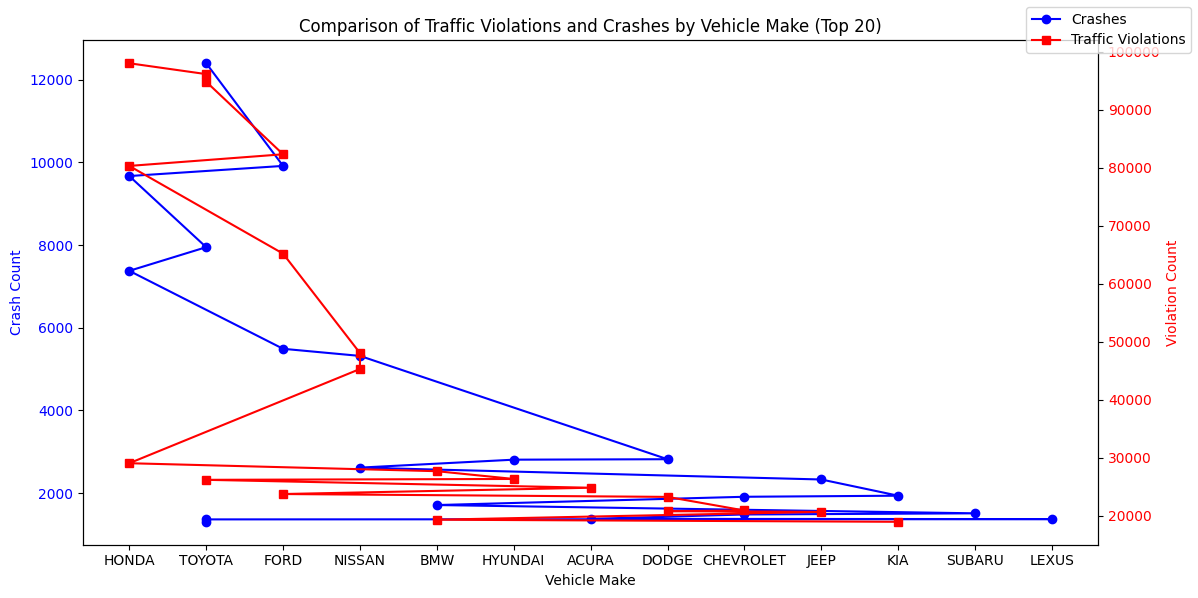

In [30]:
# Visualization 1: Comparison of Traffic Violations and Crashes by Vehicle Make

# Sort the aggregated dataframes by count
crash_report_agg_sorted = crash_report_agg.sort_values(by='Crash Count', ascending=False).head(20)
traffic_violations_agg_sorted = traffic_violations_agg.sort_values(by='Violation Count', ascending=False).head(20)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot crashes on the left y-axis
ax1.plot(crash_report_agg_sorted['Make'], crash_report_agg_sorted['Crash Count'], color='blue', marker='o', label='Crashes')
ax1.set_xlabel('Vehicle Make')
ax1.set_ylabel('Crash Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot traffic violations on the right y-axis
ax2.plot(traffic_violations_agg_sorted['Make'], traffic_violations_agg_sorted['Violation Count'], color='red', marker='s', label='Traffic Violations')
ax2.set_ylabel('Violation Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Comparison of Traffic Violations and Crashes by Vehicle Make (Top 20)')
fig.tight_layout()
fig.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

*Answer to research question: Given the noticeable presence of Toyota, Honda, and Ford in our analysis, it's clear these car makes have a higher incidence of traffic violations and crashes.*

Proportion of Driver At Fault in Crashes by Vehicle Make:

We can create a stacked bar plot to show the proportion of crashes where the driver is at fault and not at fault for each vehicle make.
This visualization will help us understand if there are certain vehicle makes where drivers are more likely to be at fault in crashes.

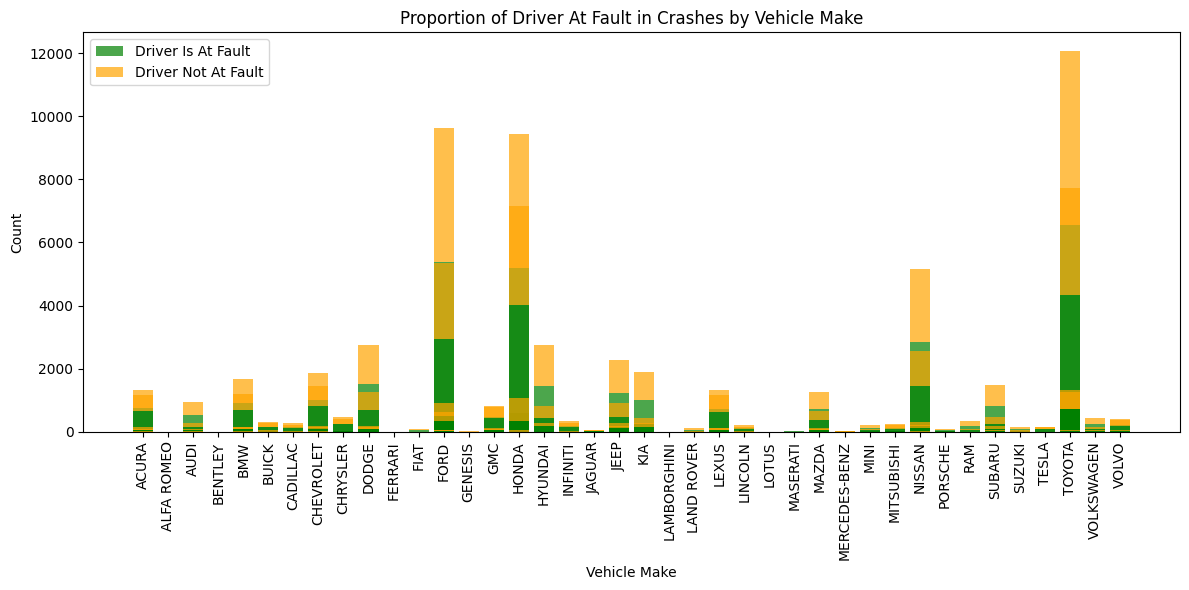

In [31]:
# Visualization 2: Proportion of Driver At Fault in Crashes by Vehicle Make
plt.figure(figsize=(12, 6))
plt.bar(crash_report_agg['Make'], crash_report_agg['Driver Is At Fault'], label='Driver Is At Fault', color='green', alpha=0.7)
plt.bar(crash_report_agg['Make'], crash_report_agg['Driver Not At Fault'], bottom=crash_report_agg['Driver Is At Fault'], label='Driver Not At Fault', color='orange', alpha=0.7)
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.title('Proportion of Driver At Fault in Crashes by Vehicle Make')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

*Answer to research question:* The vehicles of major brands like Toyota, Honda, and Ford are more frequently involved in traffic incidents, yet drivers are often not at fault. This discrepancy raises questions about the conditions under which these incidents occur.*

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*If given more time, I would delve deeper into the data quality and structural issues, especially focusing on standardizing vehicle make and model names to ensure consistency across datasets. Additionally, exploring the impact of external factors such as weather, road conditions, and time of day on the incidence of traffic violations and crashes could unveil more nuanced insights. This would allow for a more detailed analysis of the correlation between car makes/models and their involvement in traffic incidents, potentially leading to more targeted safety improvements.*